# <font color=blue>Assignments for "Imbalanced Data"</font>

Using the [dataset](https://sci2s.ugr.es/keel/dataset/data/imbalanced/cleveland-0_vs_4.zip) for the [risk of heart attack](https://sci2s.ugr.es/keel/dataset.php?cod=980) with class imbalance:

1. Create a logistic regression model and measure the performance of it.
2. By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.utils import resample
#!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE, ADASYN

In [2]:
cleveland = pd.read_csv("../../data/logistic regression/cleveland/cleveland.csv")
pd.set_option('display.max_rows', cleveland.shape[0])
cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,negative
1,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,negative
2,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,negative
3,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,negative
4,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,negative


In [3]:
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    int64  
 1   sex       177 non-null    int64  
 2   cp        177 non-null    int64  
 3   trestbps  177 non-null    int64  
 4   chol      177 non-null    int64  
 5   fbs       177 non-null    int64  
 6   restecg   177 non-null    int64  
 7   thalach   177 non-null    int64  
 8   exang     177 non-null    int64  
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    int64  
 11  ca        174 non-null    float64
 12  thal      176 non-null    float64
 13  num       177 non-null    object 
dtypes: float64(3), int64(10), object(1)
memory usage: 19.5+ KB


In [4]:
cleveland['sex']=cleveland['sex'].replace([0,1],['Female','Male'])
cleveland['cp']=cleveland['cp'].astype('object')
cleveland['restecg']=cleveland['restecg'].astype('object')
cleveland['exang']=cleveland['exang'].replace([0,1],['No','Yes'])
cleveland['fbs']=cleveland['fbs'].replace([0,1],['False','True'])

cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    int64  
 1   sex       177 non-null    object 
 2   cp        177 non-null    object 
 3   trestbps  177 non-null    int64  
 4   chol      177 non-null    int64  
 5   fbs       177 non-null    object 
 6   restecg   177 non-null    object 
 7   thalach   177 non-null    int64  
 8   exang     177 non-null    object 
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    int64  
 11  ca        174 non-null    float64
 12  thal      176 non-null    float64
 13  num       177 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 19.5+ KB


In [5]:
cleveland.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,177.000000,177,177.0,177.000000,177.000000,177,177.0,177.000000,177,177.000000,177.000000,174.000000,176.000000,177
unique,NaN,2,4.0,NaN,NaN,2,3.0,NaN,2,NaN,NaN,NaN,NaN,2
top,NaN,Male,3.0,NaN,NaN,False,0.0,NaN,No,NaN,NaN,NaN,NaN,negative
freq,NaN,103,69.0,NaN,NaN,153,97.0,NaN,148,NaN,NaN,NaN,NaN,164
mean,53.107345,NaN,NaN,129.949153,243.429379,NaN,NaN,157.073446,NaN,0.716949,1.457627,0.379310,3.977273,NaN
std,9.659240,NaN,NaN,16.417587,54.350994,NaN,NaN,19.746410,NaN,0.953430,0.612058,0.786319,1.683379,NaN
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,96.000000,NaN,0.000000,1.000000,0.000000,3.000000,NaN
25%,45.000000,NaN,NaN,120.000000,209.000000,NaN,NaN,146.000000,NaN,0.000000,1.000000,0.000000,3.000000,NaN
50%,53.000000,NaN,NaN,130.000000,234.000000,NaN,NaN,160.000000,NaN,0.300000,1.000000,0.000000,3.000000,NaN
75%,60.000000,NaN,NaN,140.000000,269.000000,NaN,NaN,172.000000,NaN,1.200000,2.000000,0.000000,6.000000,NaN


In [6]:
var_null=cleveland.isnull().sum()
var_missing=var_null[var_null!=0].index
var_missing

Index(['ca', 'thal'], dtype='object')

In [7]:
cleveland['ca'].fillna(cleveland['ca'].median(),inplace=True)
cleveland['thal'].fillna(cleveland['thal'].median(),inplace=True)
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    int64  
 1   sex       177 non-null    object 
 2   cp        177 non-null    object 
 3   trestbps  177 non-null    int64  
 4   chol      177 non-null    int64  
 5   fbs       177 non-null    object 
 6   restecg   177 non-null    object 
 7   thalach   177 non-null    int64  
 8   exang     177 non-null    object 
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    int64  
 11  ca        177 non-null    float64
 12  thal      177 non-null    float64
 13  num       177 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 19.5+ KB


In [8]:
var_numeric=cleveland.select_dtypes(include=['float64','int64'])
var_cat=cleveland.select_dtypes(include=['object'])
var_dummies=pd.get_dummies(var_cat,drop_first=True)
var_regress=pd.concat([var_numeric,var_dummies],axis=1)
var_regress.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,thal,sex_Male,cp_2,cp_3,cp_4,fbs_True,restecg_1,restecg_2,exang_Yes,num_positive
0,63,145,233,150,2.3,3,0.0,6.0,1,0,0,0,1,0,1,0,0
1,37,130,250,187,3.5,3,0.0,3.0,1,0,1,0,0,0,0,0,0
2,41,130,204,172,1.4,1,0.0,3.0,0,1,0,0,0,0,1,0,0
3,56,120,236,178,0.8,1,0.0,3.0,1,1,0,0,0,0,0,0,0
4,57,120,354,163,0.6,1,0.0,3.0,0,0,0,1,0,0,0,1,0


negative    0.926554
positive    0.073446
Name: num, dtype: float64

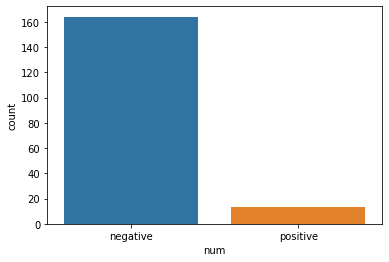

In [9]:
sns.countplot(cleveland.num)

pd.crosstab(index=cleveland['num'],columns='count')
cleveland['num'].value_counts()/cleveland['num'].value_counts().sum()


In [10]:
X = var_regress.loc[:,var_regress.columns!='num_positive'] # Features
Y = var_regress['num_positive']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 6)

In [11]:
print('The frequency table of outcome for train dataset')
display(pd.crosstab(index=Y_train,columns='count'))
print('**'*25)
print('The frequency table of outcome for test dataset')
display(pd.crosstab(index=Y_test,columns='count'))

The frequency table of outcome for train dataset


col_0,count
num_positive,
0,112
1,11


**************************************************
The frequency table of outcome for test dataset


col_0,count
num_positive,
0,52
1,2


**BUILD LOGISTIC REGRESSION MODEL**

In [12]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, Y_train)

train_accuracy = logreg.score(X_train, Y_train)
test_accuracy = logreg.score(X_test, Y_test)

print('Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy on Train Data : 0.97
Accuracy on Test Data  : 0.94


In [13]:
train_prediction = logreg.predict(X_train)
test_prediction = logreg.predict(X_test)

print(classification_report(Y_test, test_prediction))
print("f1_score() value        : {:.2f}".format(f1_score(Y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(Y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(Y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(Y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.00      0.00      0.00         2

    accuracy                           0.94        54
   macro avg       0.48      0.49      0.49        54
weighted avg       0.93      0.94      0.94        54

f1_score() value        : 0.00
recall_score() value    : 0.00
precision_score() value : 0.00


Precision  : [0.96226415 0.        ]
Recall     : [0.98076923 0.        ]
F1 Score   : [0.97142857 0.        ]


In [14]:
confusion_matrix_train = confusion_matrix(Y_train, train_prediction)
confusion_matrix_test = confusion_matrix(Y_test, test_prediction)

print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[111   1]
 [  3   8]]


Confusion Matrix (Test Data)
------------------------------
[[51  1]
 [ 2  0]]


**UP-SAMPLING**

In [15]:
hd_negative = var_regress[var_regress.num_positive== 0]
hd_positive = var_regress[var_regress.num_positive== 1]

cleveland_upsampled = resample(hd_positive,
                               replace = True,
                               n_samples = len(hd_negative),
                               random_state = 4)
upsampled_df = pd.concat([hd_negative, cleveland_upsampled])
upsampled_df.num_positive.value_counts()

1    164
0    164
Name: num_positive, dtype: int64

In [16]:
upsampled_df.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,thal,sex_Male,cp_2,cp_3,cp_4,fbs_True,restecg_1,restecg_2,exang_Yes,num_positive
0,63,145,233,150,2.3,3,0.0,6.0,1,0,0,0,1,0,1,0,0
1,37,130,250,187,3.5,3,0.0,3.0,1,0,1,0,0,0,0,0,0
2,41,130,204,172,1.4,1,0.0,3.0,0,1,0,0,0,0,1,0,0
3,56,120,236,178,0.8,1,0.0,3.0,1,1,0,0,0,0,0,0,0
4,57,120,354,163,0.6,1,0.0,3.0,0,0,0,1,0,0,0,1,0


In [17]:
def create_model(X, Y):
    X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.20, random_state=111, stratify = Y)
    
    logreg_model = LogisticRegression(solver='liblinear')
    logreg_model.fit(X_train, Y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(Y_train, pred_train)
    conf_mtx_test = confusion_matrix(Y_test, pred_test)
    
    print("Accuracy : {}\n".format(logreg_model.score(X_test, Y_test)))
    
    print("Train Dataset")
    print(classification_report(Y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(Y_test, pred_test))
    
    return  None

In [18]:
X = upsampled_df.drop('num_positive', axis=1)
Y = upsampled_df['num_positive']

create_model(X,Y)

Accuracy : 0.9545454545454546

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.92      1.00      0.96        33

    accuracy                           0.95        66
   macro avg       0.96      0.95      0.95        66
weighted avg       0.96      0.95      0.95        66



**DOWN-SAMPLING**

In [19]:
cleveland_downsampled = resample(hd_negative,
                               replace = True,
                               n_samples = len(hd_positive),
                               random_state = 4)
downsampled_df = pd.concat([cleveland_downsampled,hd_positive])
downsampled_df.num_positive.value_counts()

1    13
0    13
Name: num_positive, dtype: int64

In [20]:
X = downsampled_df.drop('num_positive', axis=1)
Y = downsampled_df['num_positive']

create_model(X,Y)

Accuracy : 1.0

Train Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



**SMOTE**

In [21]:
y = var_regress.num_positive
X = var_regress.drop('num_positive', axis=1)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_sample(X, y)

In [22]:
create_model(X_smote, y_smote)

Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       131
           1       0.94      0.99      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



**ADASYN**

In [23]:
y = var_regress.num_positive
X = var_regress.drop('num_positive', axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)

In [24]:
create_model(X_adasyn, y_adasyn)

Accuracy : 0.9545454545454546

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       132

    accuracy                           0.97       263
   macro avg       0.97      0.97      0.97       263
weighted avg       0.97      0.97      0.97       263

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.92      1.00      0.96        33

    accuracy                           0.95        66
   macro avg       0.96      0.95      0.95        66
weighted avg       0.96      0.95      0.95        66

